In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [15]:
mnist=tf.keras.datasets.mnist

In [16]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [17]:
# Normalizing the data

In [18]:
x_train,x_test=x_train/255.0,x_test/255.0

In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
# Function to create model with different activation function

In [21]:
def create_model(activation_function):
  model=tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128,activation=activation_function),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10,activation='softmax')
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model



In [22]:
# list of activation function
activation_functions=['relu','sigmoid','tanh','swish']

# dictionary to store training history
histories={}

# Training the model with different activation function

for activation in activation_functions:
  print(f" Training the model with {activation} activation function...\n")
  model=create_model(activation)
  history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))
  histories[str(activation)]=history




 Training the model with relu activation function...



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8563 - loss: 0.4945 - val_accuracy: 0.9548 - val_loss: 0.1453
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9571 - loss: 0.1477 - val_accuracy: 0.9701 - val_loss: 0.0982
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9682 - loss: 0.1069 - val_accuracy: 0.9708 - val_loss: 0.0936
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9733 - loss: 0.0858 - val_accuracy: 0.9782 - val_loss: 0.0707
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9768 - loss: 0.0735 - val_accuracy: 0.9788 - val_loss: 0.0728
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9797 - loss: 0.0616 - val_accuracy: 0.9781 - val_loss: 0.0677
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9822 - loss: 0.0539 - val_accuracy: 0.9792 - val_loss: 0.0684
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9826 - loss: 0.0519 - 

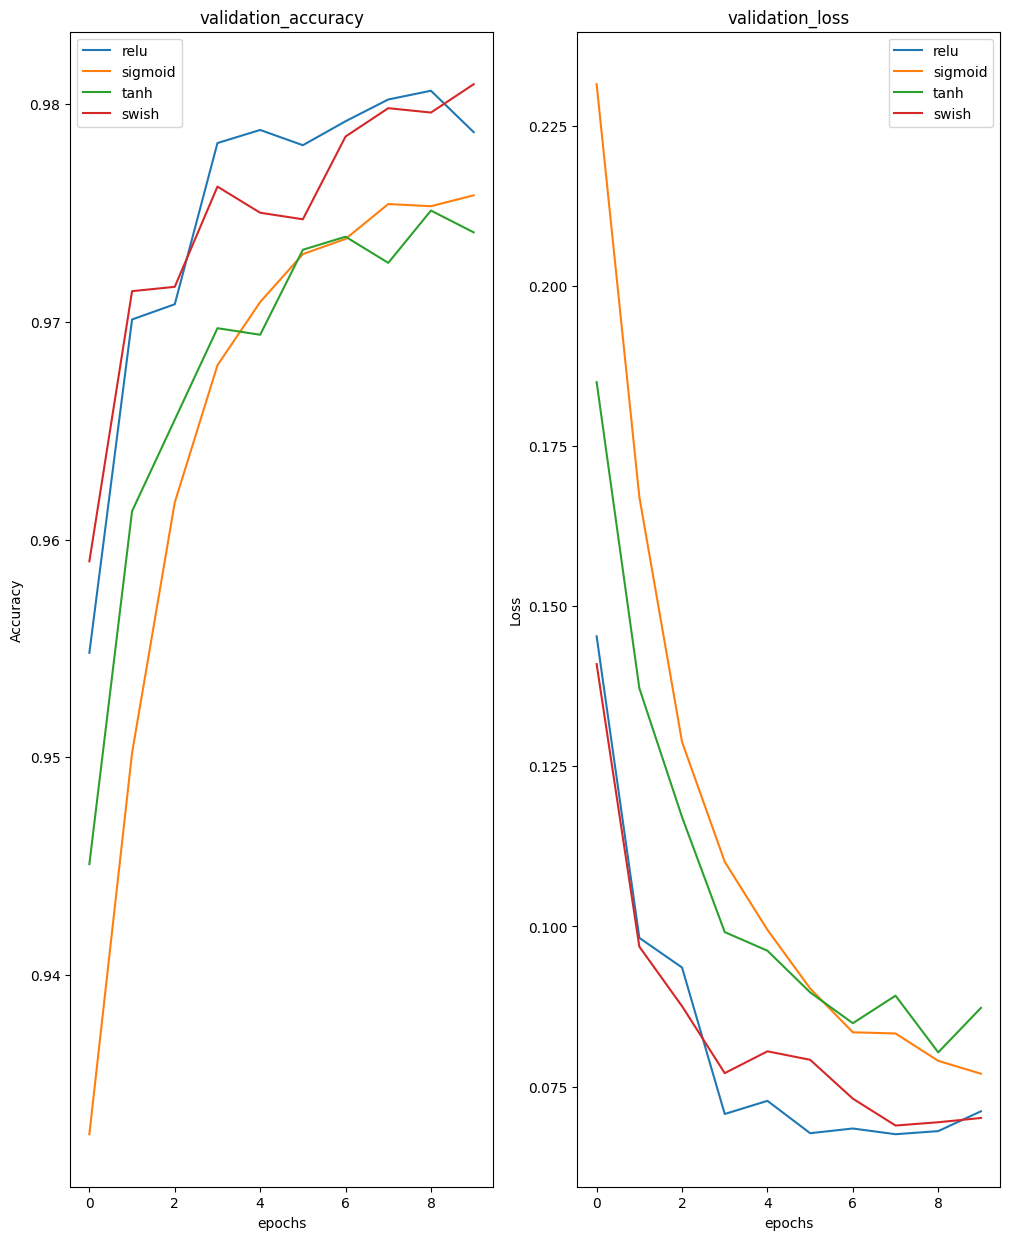

In [23]:
def plot_results(histories):
  plt.figure(figsize=(12,15))
  # accuracy plotting
  plt.subplot(1,2,1)
  for activation,history in histories.items():

    plt.plot(history.history['val_accuracy'],label=f'{activation}')
  plt.title('validation_accuracy')
  plt.xlabel('epochs')
  plt.ylabel('Accuracy')
  plt.legend()


  # plotting loss
  plt.subplot(1,2,2)
  for activation,history in histories.items():
    plt.plot(history.history['val_loss'],label=f'{activation}')
  plt.title('validation_loss')
  plt.xlabel('epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()


plot_results(histories)



In [24]:
# Relu activation gives a high accuracy

In [25]:
# plotting confusion matrix of model built with Relu fucntion
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8609 - loss: 0.4788 - val_accuracy: 0.9583 - val_loss: 0.1412
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9542 - loss: 0.1537 - val_accuracy: 0.9703 - val_loss: 0.0987
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9667 - loss: 0.1070 - val_accuracy: 0.9715 - val_loss: 0.0881
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9747 - loss: 0.0820 - val_accuracy: 0.9766 - val_loss: 0.0797
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9754 - loss: 0.0758 - val_accuracy: 0.9767 - val_loss: 0.0787
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9807 - loss: 0.0601 - val_accuracy: 0.9787 - val_loss: 0.0698
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9829 - loss: 0.0540 - val_accuracy: 0.9785 - val_loss: 0.0719
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9846 - loss: 0.0468

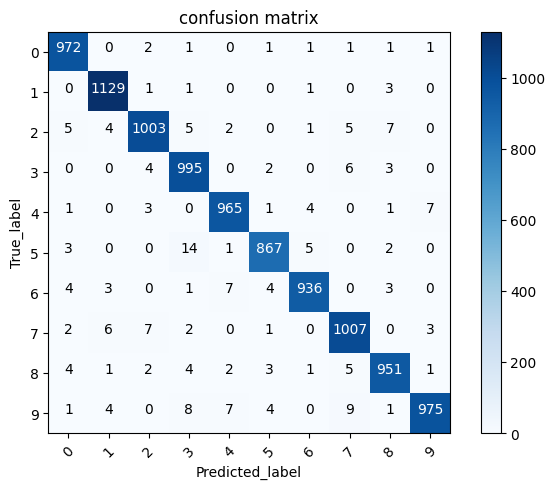

In [27]:
def plot_confusion_matrix(cm,classes,
                         normalize=False,
                         title='confusion matrix',
                         cmap=plt.cm.Blues):

  """
  this function plots the confusion matrix
  normalization can be applied by setting normalize='True'
  """
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("confusion matrix without normalization")
  print(cm)
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  fmt='.2f' if normalize else 'd'
  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment="center",
             color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True_label')
  plt.xlabel('Predicted_label')
  plt.show()
model=create_model('relu')
r=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))
p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

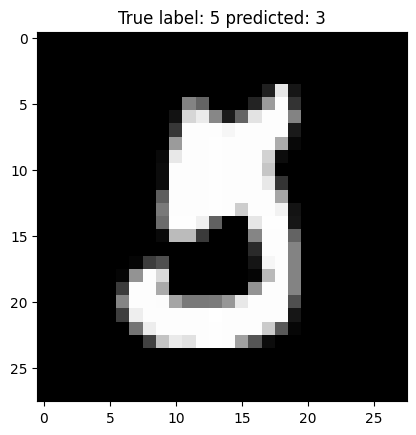

In [28]:
# show some misclassified examples
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s predicted: %s" % (y_test[i],p_test[i]));